In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import matplotlib.image as mpimg

In [24]:
image = mpimg.imread('./asseylum.jpg')

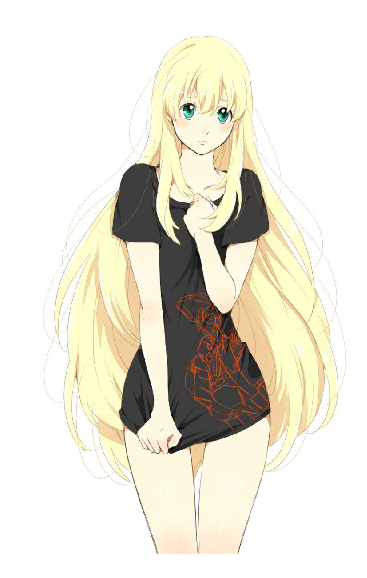

In [34]:
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(image)
plt.show()

In [26]:
data = image.reshape((image.shape[0]*image.shape[1],3))

In [8]:
data
import scipy

In [9]:
from sklearn.cluster import KMeans

In [10]:
from sklearn.cluster import MiniBatchKMeans

In [10]:
%timeit kmeans = KMeans(init='random', n_clusters=32, random_state=0).fit(data)

1 loop, best of 3: 51.7 s per loop


In [53]:
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=0).fit(data)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [12]:
%timeit kmeans = MiniBatchKMeans(init='random', n_clusters=32, random_state=0).fit(data)

1 loop, best of 3: 362 ms per loop


In [48]:
proc_data = kmeans.predict(data)
proc_data

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [49]:
new_image = []
for cluster in proc_data:
    new_image.append(kmeans.cluster_centers_[cluster])

In [50]:
new_image = np.array(new_image).astype(np.uint8)

In [51]:
new_image = new_image.reshape((image.shape[0],image.shape[1],3))

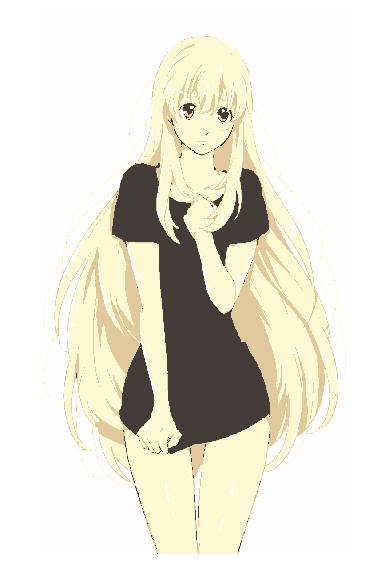

In [52]:
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(new_image)
plt.show()